# Day 92: AI in Finance and Fintech Applications

## Introduction

Artificial Intelligence has revolutionized the financial services industry, transforming how banks, investment firms, and fintech companies operate. From detecting fraudulent transactions in milliseconds to managing billion-dollar investment portfolios, AI has become an indispensable tool in modern finance.

The financial industry was one of the earliest adopters of AI and machine learning technologies, driven by the need to process vast amounts of data, identify patterns, and make split-second decisions. Today, AI applications in finance span across multiple domains including fraud detection, credit scoring, algorithmic trading, risk management, customer service, and regulatory compliance.

What makes finance particularly suitable for AI applications is the abundance of structured, numerical data and the high stakes involved in financial decisions. Every transaction, market movement, and customer interaction generates data that can be analyzed to improve decision-making and reduce risk.

### Learning Objectives

By the end of this lesson, you will be able to:

- Understand the key AI applications in finance and fintech
- Implement fraud detection systems using machine learning
- Build credit scoring models using classification algorithms
- Understand the principles of algorithmic trading and portfolio optimization
- Apply risk management techniques using statistical methods
- Evaluate the performance of financial AI models using appropriate metrics

## Theory: Key AI Applications in Finance

### 1. Fraud Detection

Fraud detection is one of the most critical applications of AI in finance. Financial institutions lose billions of dollars annually to fraud, making accurate and real-time fraud detection essential.

**How it works:**
- Machine learning models analyze transaction patterns to identify anomalies
- Features include transaction amount, location, time, merchant category, and user behavior
- Models learn from historical fraud cases to predict future fraudulent activities

**Common algorithms:**
- Logistic Regression for binary classification (fraud/not fraud)
- Random Forests for handling imbalanced datasets
- Neural Networks for complex pattern recognition
- Isolation Forests for anomaly detection

**Mathematical Foundation:**

For binary classification, we typically use the logistic function:

$$P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + ... + \beta_nx_n)}}$$

Where:
- $P(y=1|X)$ is the probability of fraud given features $X$
- $\beta_0, \beta_1, ..., \beta_n$ are the model coefficients
- $x_1, x_2, ..., x_n$ are the feature values

### 2. Credit Scoring

Credit scoring involves assessing the creditworthiness of individuals or businesses to determine their ability to repay loans. Traditional methods relied on simple rule-based systems, but modern AI approaches can capture complex patterns in borrower behavior.

**Key features used:**
- Payment history
- Credit utilization ratio
- Length of credit history
- Types of credit accounts
- Recent credit inquiries
- Income and employment status

**Credit Score Formula (Simplified):**

$$\text{Credit Score} = w_1 \cdot \text{Payment History} + w_2 \cdot \text{Credit Utilization} + w_3 \cdot \text{Credit Age} + ... + w_n \cdot \text{Feature}_n$$

Where $w_i$ are the weights learned by the model.

### 3. Algorithmic Trading

Algorithmic trading uses computer programs to execute trades based on predefined criteria. AI enhances this by identifying trading opportunities that humans might miss.

**Types of algorithmic trading:**
- **Trend Following**: Identifying and following market trends
- **Mean Reversion**: Betting that prices will return to their historical average
- **Statistical Arbitrage**: Exploiting price inefficiencies between related securities
- **Market Making**: Providing liquidity by continuously quoting buy and sell prices

**Key Mathematical Concept - Expected Return:**

$$E[R] = \sum_{i=1}^{n} p_i \cdot r_i$$

Where:
- $E[R]$ is the expected return
- $p_i$ is the probability of outcome $i$
- $r_i$ is the return in outcome $i$

### 4. Portfolio Optimization

Portfolio optimization seeks to maximize returns while minimizing risk. The classical approach is Modern Portfolio Theory (MPT) developed by Harry Markowitz.

**Sharpe Ratio:**

The Sharpe ratio measures risk-adjusted returns:

$$\text{Sharpe Ratio} = \frac{E[R_p] - R_f}{\sigma_p}$$

Where:
- $E[R_p]$ is the expected portfolio return
- $R_f$ is the risk-free rate
- $\sigma_p$ is the portfolio standard deviation (risk)

**Portfolio Variance:**

$$\sigma_p^2 = \sum_{i=1}^{n} w_i^2 \sigma_i^2 + \sum_{i=1}^{n} \sum_{j \neq i} w_i w_j \sigma_i \sigma_j \rho_{ij}$$

Where:
- $w_i$ is the weight of asset $i$ in the portfolio
- $\sigma_i$ is the standard deviation of asset $i$
- $\rho_{ij}$ is the correlation between assets $i$ and $j$

### 5. Risk Management

Risk management involves identifying, assessing, and mitigating financial risks. AI helps predict potential risks and their impacts.

**Value at Risk (VaR):**

VaR estimates the maximum potential loss over a specific time period at a given confidence level:

$$P(Loss > VaR) = 1 - \alpha$$

Where $\alpha$ is the confidence level (e.g., 95% or 99%).

**Conditional Value at Risk (CVaR):**

CVaR (also called Expected Shortfall) measures the expected loss given that the loss exceeds VaR:

$$CVaR_{\alpha} = E[Loss | Loss > VaR_{\alpha}]$$

## Python Implementation

Let's implement practical examples of AI applications in finance using Python.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4
Pandas version: 2.3.3


### 1. Fraud Detection System

We'll build a fraud detection system using synthetic transaction data. In real-world scenarios, you would use actual transaction data from payment processors.

In [2]:
# Generate synthetic fraud detection dataset
def generate_fraud_data(n_samples=10000, fraud_ratio=0.02):
    """
    Generate synthetic transaction data for fraud detection.
    
    Parameters:
    - n_samples: Total number of transactions
    - fraud_ratio: Proportion of fraudulent transactions
    """
    n_fraud = int(n_samples * fraud_ratio)
    n_legitimate = n_samples - n_fraud
    
    # Legitimate transactions
    legitimate_amounts = np.random.gamma(shape=2, scale=50, size=n_legitimate)
    legitimate_time = np.random.uniform(6, 22, n_legitimate)  # Business hours
    legitimate_distance = np.random.exponential(scale=10, size=n_legitimate)
    legitimate_freq = np.random.poisson(lam=5, size=n_legitimate)
    
    # Fraudulent transactions (different patterns)
    fraud_amounts = np.random.gamma(shape=5, scale=150, size=n_fraud)  # Higher amounts
    fraud_time = np.random.uniform(0, 24, n_fraud)  # Any time of day
    fraud_distance = np.random.exponential(scale=50, size=n_fraud)  # Unusual locations
    fraud_freq = np.random.poisson(lam=15, size=n_fraud)  # More frequent
    
    # Combine data
    amounts = np.concatenate([legitimate_amounts, fraud_amounts])
    times = np.concatenate([legitimate_time, fraud_time])
    distances = np.concatenate([legitimate_distance, fraud_distance])
    frequencies = np.concatenate([legitimate_freq, fraud_freq])
    labels = np.concatenate([np.zeros(n_legitimate), np.ones(n_fraud)])
    
    # Create DataFrame
    df = pd.DataFrame({
        'amount': amounts,
        'time_of_day': times,
        'distance_from_home': distances,
        'transaction_frequency': frequencies,
        'is_fraud': labels
    })
    
    # Shuffle the data
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return df

# Generate dataset
fraud_df = generate_fraud_data(n_samples=10000, fraud_ratio=0.02)

print("Fraud Detection Dataset:")
print(f"Total transactions: {len(fraud_df)}")
print(f"Fraudulent transactions: {fraud_df['is_fraud'].sum()}")
print(f"Fraud rate: {fraud_df['is_fraud'].mean():.2%}")
print("\nFirst few rows:")
print(fraud_df.head(10))
print("\nDataset statistics:")
print(fraud_df.describe())

Fraud Detection Dataset:
Total transactions: 10000
Fraudulent transactions: 200.0
Fraud rate: 2.00%

First few rows:
       amount  time_of_day  distance_from_home  transaction_frequency  \
0   27.882979    17.527045           13.377898                      6   
1   40.093599    19.388258            5.242997                      2   
2  200.681182    12.433484            6.942722                      3   
3   73.022615     7.752280            7.773223                      5   
4  129.432323    21.957112            0.897909                      8   
5  158.356472    16.007072            8.758269                      4   
6   48.160808    20.426327            0.532089                      6   
7   76.798251    18.693889           18.731955                      2   
8   75.446807    16.578661            7.506580                      6   
9  257.865364    12.453712           12.054053                      7   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0

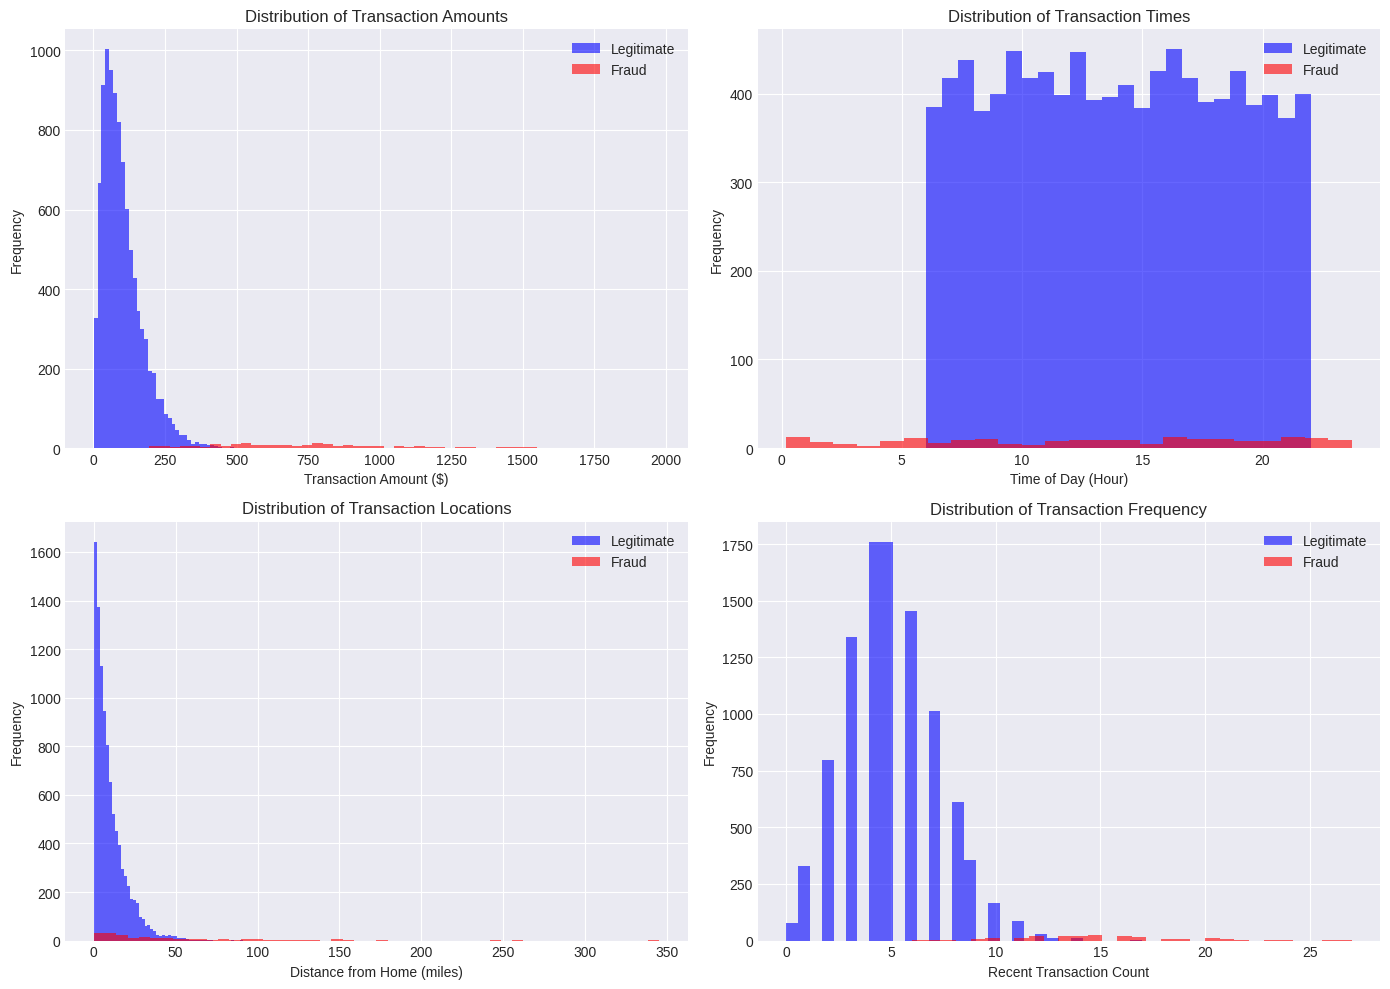

Key Observations:
1. Fraudulent transactions tend to have higher amounts
2. Fraud occurs more evenly throughout the day, while legitimate transactions peak during business hours
3. Fraudulent transactions often occur farther from the user's home location
4. Fraud is associated with higher transaction frequencies


In [3]:
# Visualize the fraud data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Transaction amounts
axes[0, 0].hist(fraud_df[fraud_df['is_fraud']==0]['amount'], bins=50, alpha=0.6, label='Legitimate', color='blue')
axes[0, 0].hist(fraud_df[fraud_df['is_fraud']==1]['amount'], bins=50, alpha=0.6, label='Fraud', color='red')
axes[0, 0].set_xlabel('Transaction Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Transaction Amounts')
axes[0, 0].legend()

# Plot 2: Time of day
axes[0, 1].hist(fraud_df[fraud_df['is_fraud']==0]['time_of_day'], bins=24, alpha=0.6, label='Legitimate', color='blue')
axes[0, 1].hist(fraud_df[fraud_df['is_fraud']==1]['time_of_day'], bins=24, alpha=0.6, label='Fraud', color='red')
axes[0, 1].set_xlabel('Time of Day (Hour)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Transaction Times')
axes[0, 1].legend()

# Plot 3: Distance from home
axes[1, 0].hist(fraud_df[fraud_df['is_fraud']==0]['distance_from_home'], bins=50, alpha=0.6, label='Legitimate', color='blue')
axes[1, 0].hist(fraud_df[fraud_df['is_fraud']==1]['distance_from_home'], bins=50, alpha=0.6, label='Fraud', color='red')
axes[1, 0].set_xlabel('Distance from Home (miles)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Transaction Locations')
axes[1, 0].legend()

# Plot 4: Transaction frequency
axes[1, 1].hist(fraud_df[fraud_df['is_fraud']==0]['transaction_frequency'], bins=30, alpha=0.6, label='Legitimate', color='blue')
axes[1, 1].hist(fraud_df[fraud_df['is_fraud']==1]['transaction_frequency'], bins=30, alpha=0.6, label='Fraud', color='red')
axes[1, 1].set_xlabel('Recent Transaction Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Transaction Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("Key Observations:")
print("1. Fraudulent transactions tend to have higher amounts")
print("2. Fraud occurs more evenly throughout the day, while legitimate transactions peak during business hours")
print("3. Fraudulent transactions often occur farther from the user's home location")
print("4. Fraud is associated with higher transaction frequencies")

In [4]:
# Build fraud detection model

# Prepare features and target
X = fraud_df[['amount', 'time_of_day', 'distance_from_home', 'transaction_frequency']]
y = fraud_df['is_fraud']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate models
print("="*60)
print("LOGISTIC REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_pred_proba):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

print("\n" + "="*60)
print("RANDOM FOREST MODEL PERFORMANCE")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_pred_proba):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("\n" + "="*60)
print("MODEL INTERPRETATION")
print("="*60)
print("\nFeature Importance (Random Forest):")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)

LOGISTIC REGRESSION MODEL PERFORMANCE
Accuracy: 0.9990
Precision: 0.9524
Recall: 1.0000
F1-Score: 0.9756
ROC-AUC Score: 1.0000

Confusion Matrix:
[[2937    3]
 [   0   60]]

RANDOM FOREST MODEL PERFORMANCE
Accuracy: 0.9983
Precision: 0.9825
Recall: 0.9333
F1-Score: 0.9573
ROC-AUC Score: 0.9999

Confusion Matrix:
[[2939    1]
 [   4   56]]

MODEL INTERPRETATION

Feature Importance (Random Forest):
                 Feature  Importance
0                 amount    0.598130
3  transaction_frequency    0.334406
2     distance_from_home    0.053167
1            time_of_day    0.014297


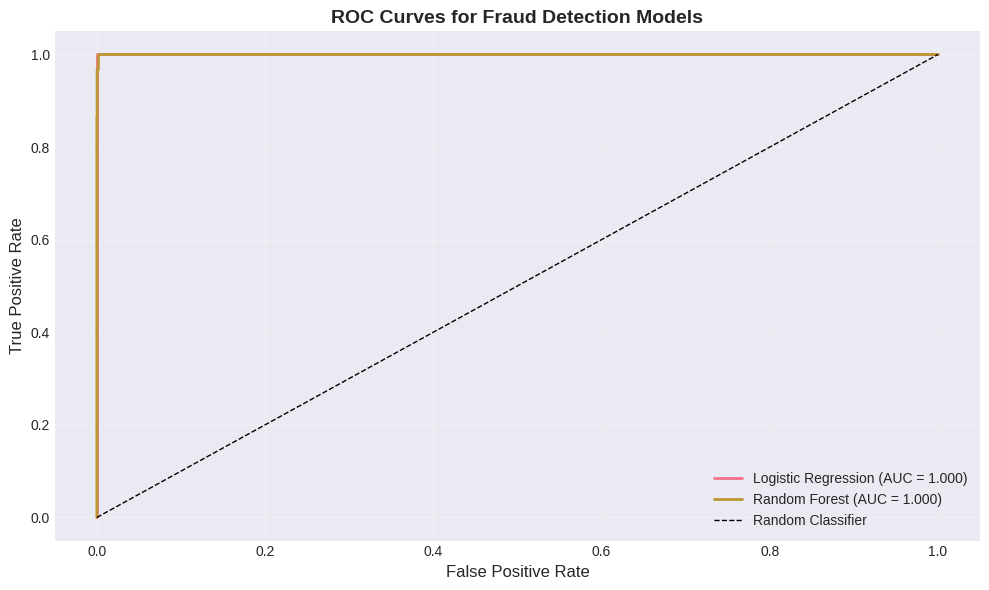


ROC Curve Interpretation:
- The ROC curve shows the trade-off between True Positive Rate and False Positive Rate
- AUC (Area Under Curve) closer to 1.0 indicates better model performance
- Both models perform well, with Random Forest showing slightly better performance


In [5]:
# Plot ROC curves
plt.figure(figsize=(10, 6))

# Calculate ROC curve for both models
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_proba)

# Plot ROC curves
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_pred_proba):.3f})', linewidth=2)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_pred_proba):.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Fraud Detection Models', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nROC Curve Interpretation:")
print("- The ROC curve shows the trade-off between True Positive Rate and False Positive Rate")
print("- AUC (Area Under Curve) closer to 1.0 indicates better model performance")
print("- Both models perform well, with Random Forest showing slightly better performance")

### 2. Credit Scoring Model

Credit scoring is crucial for lending decisions. We'll build a model to predict credit risk based on various financial factors.

In [6]:
# Generate synthetic credit scoring dataset
def generate_credit_data(n_samples=5000):
    """
    Generate synthetic credit data for credit scoring.
    """
    # Generate features
    income = np.random.gamma(shape=2, scale=30000, size=n_samples)
    age = np.random.normal(loc=40, scale=12, size=n_samples).clip(18, 80)
    credit_history_length = np.random.exponential(scale=8, size=n_samples).clip(0, 40)
    num_credit_accounts = np.random.poisson(lam=4, size=n_samples)
    credit_utilization = np.random.beta(a=2, b=5, size=n_samples)  # 0 to 1
    payment_history = np.random.beta(a=8, b=2, size=n_samples)  # Higher is better
    
    # Calculate credit score (simplified)
    credit_score_raw = (
        0.35 * payment_history * 100 +
        0.30 * (1 - credit_utilization) * 100 +
        0.15 * np.clip(credit_history_length / 40, 0, 1) * 100 +
        0.10 * np.clip(income / 100000, 0, 1) * 100 +
        0.10 * np.clip(num_credit_accounts / 10, 0, 1) * 100 +
        np.random.normal(0, 5, n_samples)  # Add some noise
    )
    
    # Normalize to 300-850 range (typical FICO score range)
    credit_score = 300 + (credit_score_raw / 100) * 550
    credit_score = credit_score.clip(300, 850)
    
    # Create default label (1 = default, 0 = no default)
    # Lower credit scores have higher default probability
    default_prob = 1 / (1 + np.exp((credit_score - 600) / 50))
    default = (np.random.random(n_samples) < default_prob).astype(int)
    
    df = pd.DataFrame({
        'income': income,
        'age': age,
        'credit_history_length': credit_history_length,
        'num_credit_accounts': num_credit_accounts,
        'credit_utilization': credit_utilization,
        'payment_history_score': payment_history,
        'credit_score': credit_score,
        'default': default
    })
    
    return df

# Generate dataset
credit_df = generate_credit_data(n_samples=5000)

print("Credit Scoring Dataset:")
print(f"Total applications: {len(credit_df)}")
print(f"Defaults: {credit_df['default'].sum()}")
print(f"Default rate: {credit_df['default'].mean():.2%}")
print("\nFirst few rows:")
print(credit_df.head(10))
print("\nDataset statistics:")
print(credit_df.describe())

Credit Scoring Dataset:
Total applications: 5000
Defaults: 1740
Default rate: 34.80%

First few rows:
          income        age  credit_history_length  num_credit_accounts  \
0   63099.876337  37.129391               2.422341                    4   
1  101352.954665  41.306457              16.726144                    9   
2   92626.332696  38.921128               1.849207                    4   
3  102370.816719  49.488073               1.293974                    3   
4   38493.518990  75.474555               3.172431                    9   
5   32074.441877  27.315757               2.870595                    4   
6   49478.705470  43.271286              10.776213                    5   
7   48964.986344  31.938741               3.877447                    3   
8   33980.110074  51.145289               1.820231                    7   
9   70579.952074  62.095730               1.243970                    4   

   credit_utilization  payment_history_score  credit_score  default  
0 

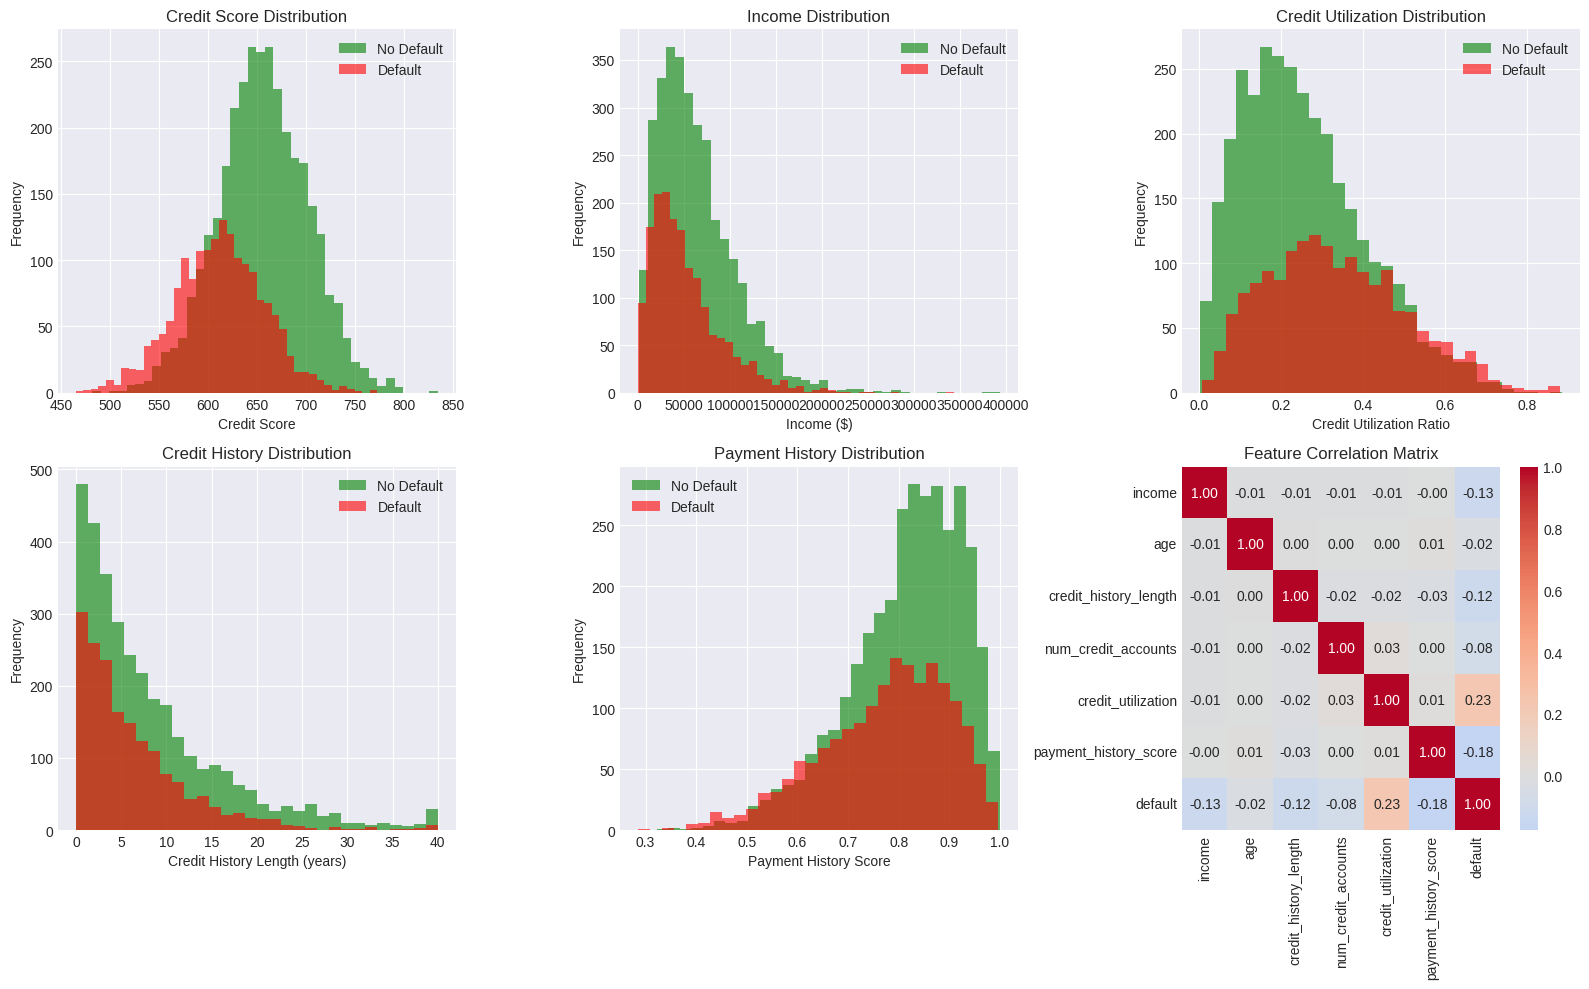


Key Insights:
1. Lower credit scores strongly correlate with higher default rates
2. Higher credit utilization is associated with increased default risk
3. Payment history is a strong predictor of default probability
4. Longer credit history tends to reduce default risk


In [7]:
# Visualize credit data
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plot 1: Credit Score distribution
axes[0, 0].hist(credit_df[credit_df['default']==0]['credit_score'], bins=40, alpha=0.6, label='No Default', color='green')
axes[0, 0].hist(credit_df[credit_df['default']==1]['credit_score'], bins=40, alpha=0.6, label='Default', color='red')
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Credit Score Distribution')
axes[0, 0].legend()

# Plot 2: Income distribution
axes[0, 1].hist(credit_df[credit_df['default']==0]['income'], bins=40, alpha=0.6, label='No Default', color='green')
axes[0, 1].hist(credit_df[credit_df['default']==1]['income'], bins=40, alpha=0.6, label='Default', color='red')
axes[0, 1].set_xlabel('Income ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Income Distribution')
axes[0, 1].legend()

# Plot 3: Credit Utilization
axes[0, 2].hist(credit_df[credit_df['default']==0]['credit_utilization'], bins=30, alpha=0.6, label='No Default', color='green')
axes[0, 2].hist(credit_df[credit_df['default']==1]['credit_utilization'], bins=30, alpha=0.6, label='Default', color='red')
axes[0, 2].set_xlabel('Credit Utilization Ratio')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Credit Utilization Distribution')
axes[0, 2].legend()

# Plot 4: Credit History Length
axes[1, 0].hist(credit_df[credit_df['default']==0]['credit_history_length'], bins=30, alpha=0.6, label='No Default', color='green')
axes[1, 0].hist(credit_df[credit_df['default']==1]['credit_history_length'], bins=30, alpha=0.6, label='Default', color='red')
axes[1, 0].set_xlabel('Credit History Length (years)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Credit History Distribution')
axes[1, 0].legend()

# Plot 5: Payment History Score
axes[1, 1].hist(credit_df[credit_df['default']==0]['payment_history_score'], bins=30, alpha=0.6, label='No Default', color='green')
axes[1, 1].hist(credit_df[credit_df['default']==1]['payment_history_score'], bins=30, alpha=0.6, label='Default', color='red')
axes[1, 1].set_xlabel('Payment History Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Payment History Distribution')
axes[1, 1].legend()

# Plot 6: Correlation heatmap
corr_matrix = credit_df[['income', 'age', 'credit_history_length', 'num_credit_accounts', 
                          'credit_utilization', 'payment_history_score', 'default']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 2], center=0)
axes[1, 2].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("1. Lower credit scores strongly correlate with higher default rates")
print("2. Higher credit utilization is associated with increased default risk")
print("3. Payment history is a strong predictor of default probability")
print("4. Longer credit history tends to reduce default risk")

CREDIT SCORING MODEL PERFORMANCE
Accuracy: 0.6440
Precision: 0.4891
Recall: 0.5153
F1-Score: 0.5019
ROC-AUC Score: 0.6662

Confusion Matrix:
[[697 281]
 [253 269]]

FEATURE IMPORTANCE
                 Feature  Importance
4     credit_utilization    0.246722
5  payment_history_score    0.194952
0                 income    0.185515
2  credit_history_length    0.172103
1                    age    0.128598
3    num_credit_accounts    0.072110


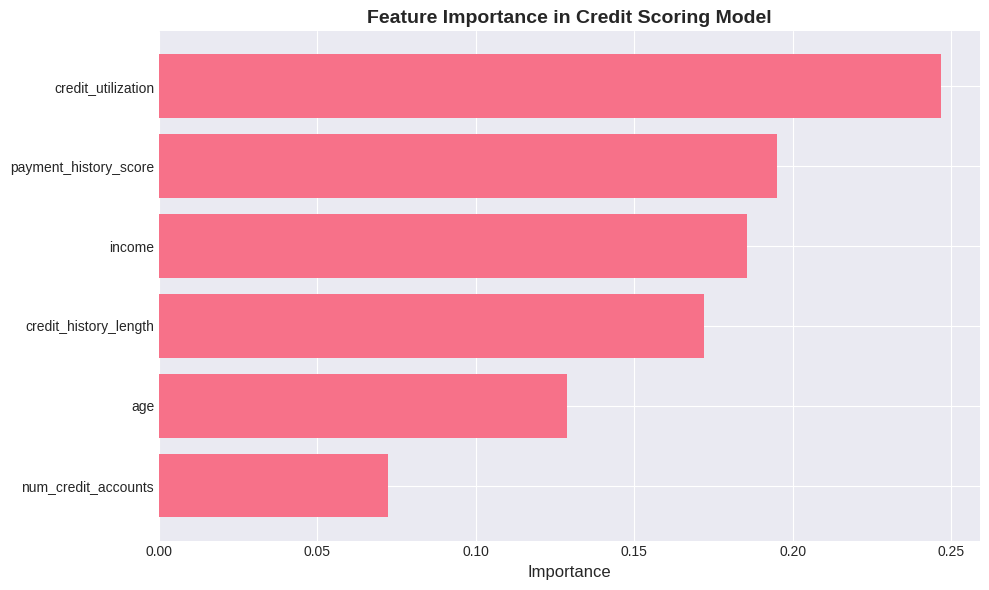

In [8]:
# Build credit scoring model

# Prepare features (excluding credit_score as it's derived from other features)
X_credit = credit_df[['income', 'age', 'credit_history_length', 'num_credit_accounts', 
                       'credit_utilization', 'payment_history_score']]
y_credit = credit_df['default']

# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_credit, y_credit, test_size=0.3, random_state=42, stratify=y_credit
)

# Scale features
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

# Train Random Forest model
credit_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')
credit_model.fit(X_train_c_scaled, y_train_c)

# Make predictions
credit_pred = credit_model.predict(X_test_c_scaled)
credit_pred_proba = credit_model.predict_proba(X_test_c_scaled)[:, 1]

# Evaluate model
print("="*60)
print("CREDIT SCORING MODEL PERFORMANCE")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test_c, credit_pred):.4f}")
print(f"Precision: {precision_score(y_test_c, credit_pred):.4f}")
print(f"Recall: {recall_score(y_test_c, credit_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_c, credit_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test_c, credit_pred_proba):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_c, credit_pred))

print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)
feature_importance_credit = pd.DataFrame({
    'Feature': X_credit.columns,
    'Importance': credit_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance_credit)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_credit['Feature'], feature_importance_credit['Importance'])
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance in Credit Scoring Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 3. Portfolio Optimization

Portfolio optimization helps investors maximize returns while managing risk. We'll implement a simple portfolio optimizer using historical stock data simulation.

In [9]:
# Generate synthetic stock returns data
def generate_stock_returns(n_days=252, n_stocks=5):
    """
    Generate synthetic daily stock returns for portfolio analysis.
    252 trading days = 1 year
    """
    # Stock names
    stock_names = [f'Stock_{chr(65+i)}' for i in range(n_stocks)]
    
    # Expected annual returns (varied)
    expected_returns = np.array([0.10, 0.12, 0.08, 0.15, 0.09])
    
    # Volatilities (standard deviations)
    volatilities = np.array([0.15, 0.20, 0.12, 0.25, 0.18])
    
    # Correlation matrix (some stocks are correlated)
    correlation_matrix = np.array([
        [1.0, 0.6, 0.3, 0.2, 0.4],
        [0.6, 1.0, 0.4, 0.3, 0.5],
        [0.3, 0.4, 1.0, 0.2, 0.3],
        [0.2, 0.3, 0.2, 1.0, 0.1],
        [0.4, 0.5, 0.3, 0.1, 1.0]
    ])
    
    # Convert to covariance matrix
    cov_matrix = np.outer(volatilities, volatilities) * correlation_matrix
    
    # Generate daily returns (convert annual to daily)
    daily_returns = np.random.multivariate_normal(
        mean=expected_returns / 252,
        cov=cov_matrix / 252,
        size=n_days
    )
    
    # Create DataFrame
    returns_df = pd.DataFrame(daily_returns, columns=stock_names)
    
    return returns_df, expected_returns, volatilities, cov_matrix

# Generate data
returns_df, exp_returns, volatilities, cov_matrix = generate_stock_returns(n_days=252, n_stocks=5)

print("Stock Returns Data:")
print(f"Number of trading days: {len(returns_df)}")
print(f"Number of stocks: {len(returns_df.columns)}")
print("\nFirst few rows of daily returns:")
print(returns_df.head(10))
print("\nAnnualized Statistics:")
print("Expected Returns:", exp_returns)
print("Volatilities:", volatilities)
print("\nActual Mean Daily Returns:")
print(returns_df.mean())
print("\nActual Daily Volatilities:")
print(returns_df.std())

Stock Returns Data:
Number of trading days: 252
Number of stocks: 5

First few rows of daily returns:
    Stock_A   Stock_B   Stock_C   Stock_D   Stock_E
0  0.010851  0.019897 -0.007928 -0.009201  0.017402
1  0.009338  0.011298  0.000923  0.051676  0.001904
2  0.000657  0.006532 -0.000802  0.004850 -0.003215
3 -0.007431 -0.006639  0.010230 -0.015059  0.005554
4  0.016885 -0.002598 -0.002031  0.005046 -0.011022
5 -0.009343  0.003868  0.001442 -0.002151 -0.009428
6 -0.010382  0.003748  0.004618  0.029352 -0.014139
7 -0.006329 -0.004283  0.001025  0.004774 -0.010532
8 -0.000083 -0.005441 -0.002525 -0.021452  0.005572
9 -0.000834 -0.001340 -0.005097 -0.033766 -0.006756

Annualized Statistics:
Expected Returns: [0.1  0.12 0.08 0.15 0.09]
Volatilities: [0.15 0.2  0.12 0.25 0.18]

Actual Mean Daily Returns:
Stock_A    0.000139
Stock_B   -0.000239
Stock_C    0.000246
Stock_D    0.002075
Stock_E   -0.000875
dtype: float64

Actual Daily Volatilities:
Stock_A    0.009603
Stock_B    0.012122
Stock

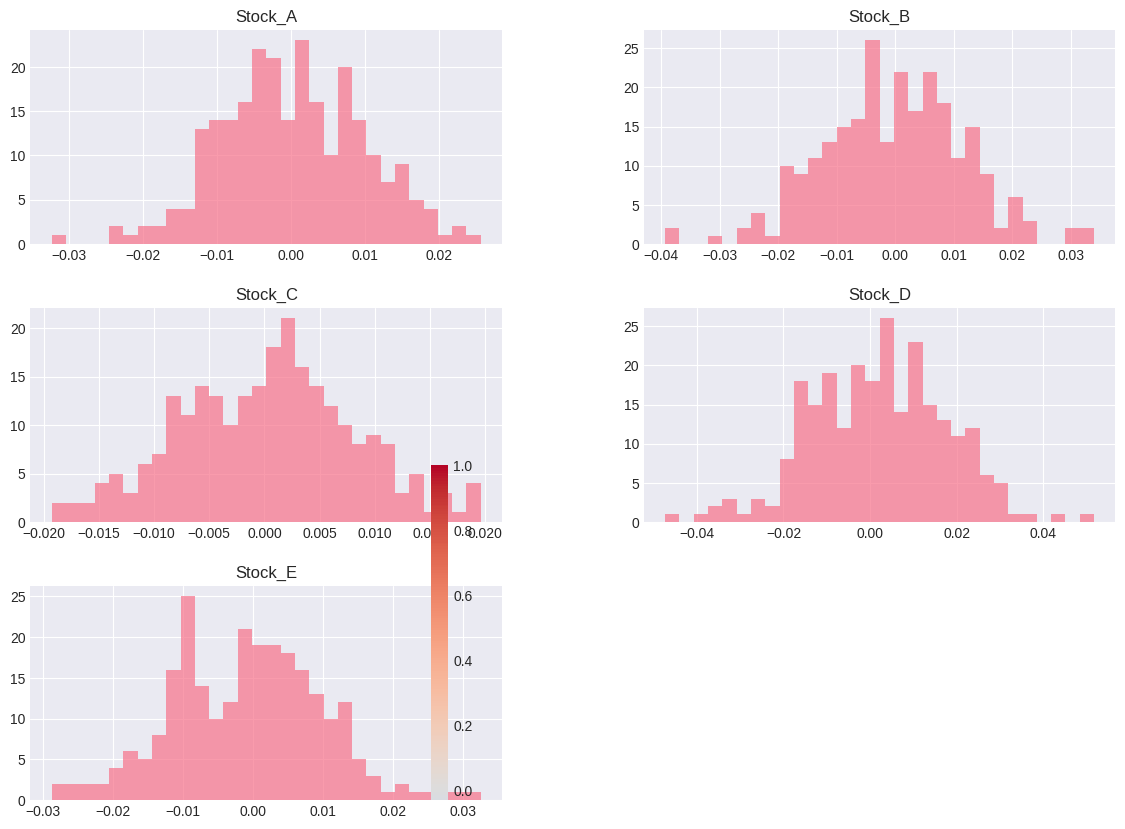

In [10]:
# Visualize stock performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Cumulative returns
cumulative_returns = (1 + returns_df).cumprod()
axes[0, 0].plot(cumulative_returns)
axes[0, 0].set_xlabel('Trading Days')
axes[0, 0].set_ylabel('Cumulative Return')
axes[0, 0].set_title('Cumulative Returns Over Time')
axes[0, 0].legend(returns_df.columns, loc='best')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Daily returns distribution
returns_df.hist(bins=30, ax=axes[0, 1], alpha=0.7)
axes[0, 1].set_title('Distribution of Daily Returns')

# Plot 3: Correlation heatmap
sns.heatmap(returns_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 0], center=0)
axes[1, 0].set_title('Stock Returns Correlation Matrix')

# Plot 4: Risk-Return scatter
annual_returns = returns_df.mean() * 252
annual_vol = returns_df.std() * np.sqrt(252)
axes[1, 1].scatter(annual_vol, annual_returns, s=100, alpha=0.7)
for i, stock in enumerate(returns_df.columns):
    axes[1, 1].annotate(stock, (annual_vol[i], annual_returns[i]), 
                        xytext=(5, 5), textcoords='offset points')
axes[1, 1].set_xlabel('Annualized Volatility (Risk)')
axes[1, 1].set_ylabel('Annualized Return')
axes[1, 1].set_title('Risk-Return Profile')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Portfolio optimization using Monte Carlo simulation

def portfolio_performance(weights, returns_df):
    """
    Calculate portfolio return, volatility, and Sharpe ratio.
    """
    # Annualized return
    portfolio_return = np.sum(returns_df.mean() * weights) * 252
    
    # Annualized volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_df.cov() * 252, weights)))
    
    # Sharpe ratio (assuming risk-free rate = 0.02)
    sharpe_ratio = (portfolio_return - 0.02) / portfolio_volatility
    
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Monte Carlo simulation for portfolio optimization
n_portfolios = 10000
n_stocks = len(returns_df.columns)

results = np.zeros((4, n_portfolios))
weights_record = []

for i in range(n_portfolios):
    # Generate random weights
    weights = np.random.random(n_stocks)
    weights /= weights.sum()  # Normalize to sum to 1
    
    # Calculate portfolio metrics
    port_return, port_vol, sharpe = portfolio_performance(weights, returns_df)
    
    # Store results
    results[0, i] = port_return
    results[1, i] = port_vol
    results[2, i] = sharpe
    results[3, i] = i
    weights_record.append(weights)

# Find optimal portfolios
max_sharpe_idx = np.argmax(results[2])
min_vol_idx = np.argmin(results[1])

max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_vol = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]

min_vol_return = results[0, min_vol_idx]
min_vol_vol = results[1, min_vol_idx]
min_vol_sharpe = results[2, min_vol_idx]
min_vol_weights = weights_record[min_vol_idx]

print("="*60)
print("PORTFOLIO OPTIMIZATION RESULTS")
print("="*60)
print(f"\nSimulated {n_portfolios:,} random portfolios")

print("\n" + "="*60)
print("MAXIMUM SHARPE RATIO PORTFOLIO")
print("="*60)
print(f"Expected Return: {max_sharpe_return:.2%}")
print(f"Volatility (Risk): {max_sharpe_vol:.2%}")
print(f"Sharpe Ratio: {max_sharpe_ratio:.4f}")
print("\nPortfolio Allocation:")
for i, stock in enumerate(returns_df.columns):
    print(f"  {stock}: {max_sharpe_weights[i]:.2%}")

print("\n" + "="*60)
print("MINIMUM VOLATILITY PORTFOLIO")
print("="*60)
print(f"Expected Return: {min_vol_return:.2%}")
print(f"Volatility (Risk): {min_vol_vol:.2%}")
print(f"Sharpe Ratio: {min_vol_sharpe:.4f}")
print("\nPortfolio Allocation:")
for i, stock in enumerate(returns_df.columns):
    print(f"  {stock}: {min_vol_weights[i]:.2%}")

PORTFOLIO OPTIMIZATION RESULTS

Simulated 10,000 random portfolios

MAXIMUM SHARPE RATIO PORTFOLIO
Expected Return: 44.17%
Volatility (Risk): 21.43%
Sharpe Ratio: 1.9674

Portfolio Allocation:
  Stock_A: 7.90%
  Stock_B: 5.10%
  Stock_C: 2.21%
  Stock_D: 84.43%
  Stock_E: 0.36%

MINIMUM VOLATILITY PORTFOLIO
Expected Return: 7.88%
Volatility (Risk): 10.22%
Sharpe Ratio: 0.5750

Portfolio Allocation:
  Stock_A: 23.70%
  Stock_B: 0.21%
  Stock_C: 42.18%
  Stock_D: 16.04%
  Stock_E: 17.88%


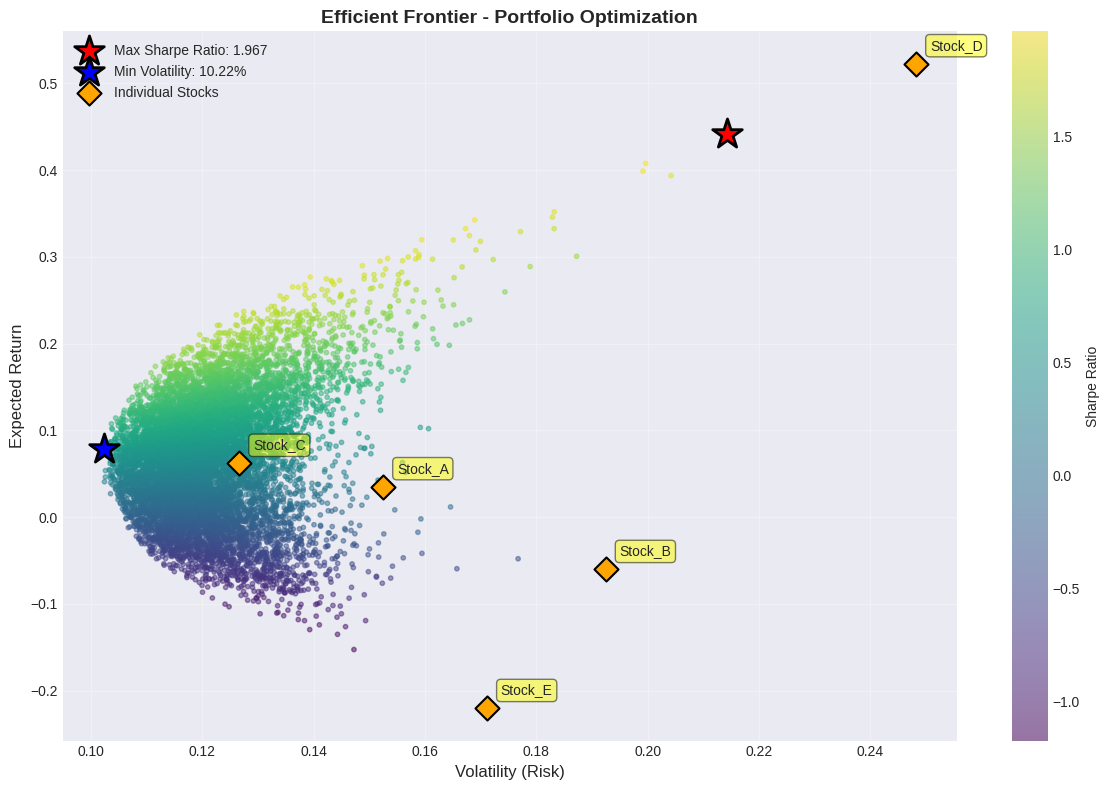


Efficient Frontier Interpretation:
- Each point represents a possible portfolio combination
- The efficient frontier shows the best possible return for each level of risk
- The red star shows the portfolio with the highest risk-adjusted return (Sharpe ratio)
- The blue star shows the portfolio with the lowest volatility (minimum risk)
- Orange diamonds represent individual stocks
- Diversified portfolios typically offer better risk-return profiles than individual stocks


In [12]:
# Plot Efficient Frontier
plt.figure(figsize=(12, 8))

# Scatter plot of all portfolios
scatter = plt.scatter(results[1, :], results[0, :], c=results[2, :], 
                      cmap='viridis', alpha=0.5, s=10)
plt.colorbar(scatter, label='Sharpe Ratio')

# Mark the maximum Sharpe ratio portfolio
plt.scatter(max_sharpe_vol, max_sharpe_return, 
           marker='*', color='red', s=500, edgecolors='black', linewidth=2,
           label=f'Max Sharpe Ratio: {max_sharpe_ratio:.3f}')

# Mark the minimum volatility portfolio
plt.scatter(min_vol_vol, min_vol_return, 
           marker='*', color='blue', s=500, edgecolors='black', linewidth=2,
           label=f'Min Volatility: {min_vol_vol:.2%}')

# Plot individual stocks
annual_returns = returns_df.mean() * 252
annual_vol = returns_df.std() * np.sqrt(252)
plt.scatter(annual_vol, annual_returns, marker='D', s=150, 
           color='orange', edgecolors='black', linewidth=1.5,
           label='Individual Stocks')

for i, stock in enumerate(returns_df.columns):
    plt.annotate(stock, (annual_vol[i], annual_returns[i]), 
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

plt.xlabel('Volatility (Risk)', fontsize=12)
plt.ylabel('Expected Return', fontsize=12)
plt.title('Efficient Frontier - Portfolio Optimization', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nEfficient Frontier Interpretation:")
print("- Each point represents a possible portfolio combination")
print("- The efficient frontier shows the best possible return for each level of risk")
print("- The red star shows the portfolio with the highest risk-adjusted return (Sharpe ratio)")
print("- The blue star shows the portfolio with the lowest volatility (minimum risk)")
print("- Orange diamonds represent individual stocks")
print("- Diversified portfolios typically offer better risk-return profiles than individual stocks")

## Hands-On Activity: Building a Simple Trading Strategy

Now let's put everything together by building a simple momentum-based trading strategy and backtesting it.

**Momentum Strategy:**
- Buy when short-term moving average crosses above long-term moving average (golden cross)
- Sell when short-term moving average crosses below long-term moving average (death cross)

In [13]:
# Generate synthetic price data for a single stock
def generate_stock_prices(n_days=500, initial_price=100):
    """
    Generate synthetic stock price data with trend and noise.
    """
    # Parameters
    drift = 0.0003  # Daily drift (upward trend)
    volatility = 0.02  # Daily volatility
    
    # Generate returns
    daily_returns = np.random.normal(drift, volatility, n_days)
    
    # Calculate prices
    price_multipliers = np.exp(daily_returns)
    prices = initial_price * np.cumprod(price_multipliers)
    
    return prices

# Generate price data
n_days = 500
prices = generate_stock_prices(n_days=n_days, initial_price=100)

# Create DataFrame
price_df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=n_days, freq='D'),
    'Price': prices
})
price_df.set_index('Date', inplace=True)

# Calculate moving averages
price_df['MA_Short'] = price_df['Price'].rolling(window=20).mean()  # 20-day MA
price_df['MA_Long'] = price_df['Price'].rolling(window=50).mean()   # 50-day MA

# Generate trading signals
price_df['Signal'] = 0
price_df.loc[price_df['MA_Short'] > price_df['MA_Long'], 'Signal'] = 1  # Buy signal
price_df.loc[price_df['MA_Short'] <= price_df['MA_Long'], 'Signal'] = -1  # Sell signal

# Identify position changes
price_df['Position'] = price_df['Signal'].diff()

print("Trading Strategy Data:")
print(f"Total days: {len(price_df)}")
print(f"\nFirst few rows:")
print(price_df.head(60))
print(f"\nBuy signals (golden crosses): {(price_df['Position'] == 2).sum()}")
print(f"Sell signals (death crosses): {(price_df['Position'] == -2).sum()}")

Trading Strategy Data:
Total days: 500

First few rows:
                 Price    MA_Short     MA_Long  Signal  Position
Date                                                            
2023-01-01   98.096878         NaN         NaN       0       NaN
2023-01-02   98.732124         NaN         NaN       0       0.0
2023-01-03   99.310750         NaN         NaN       0       0.0
2023-01-04  102.199568         NaN         NaN       0       0.0
2023-01-05  103.485183         NaN         NaN       0       0.0
2023-01-06  103.169172         NaN         NaN       0       0.0
2023-01-07  100.042742         NaN         NaN       0       0.0
2023-01-08   97.067590         NaN         NaN       0       0.0
2023-01-09   97.371721         NaN         NaN       0       0.0
2023-01-10   96.497514         NaN         NaN       0       0.0
2023-01-11   99.139204         NaN         NaN       0       0.0
2023-01-12   99.677315         NaN         NaN       0       0.0
2023-01-13   98.657313         NaN

In [14]:
# Backtest the trading strategy

# Calculate returns
price_df['Daily_Return'] = price_df['Price'].pct_change()
price_df['Strategy_Return'] = price_df['Signal'].shift(1) * price_df['Daily_Return']

# Calculate cumulative returns
price_df['Cumulative_Market_Return'] = (1 + price_df['Daily_Return']).cumprod()
price_df['Cumulative_Strategy_Return'] = (1 + price_df['Strategy_Return']).cumprod()

# Calculate performance metrics
total_market_return = price_df['Cumulative_Market_Return'].iloc[-1] - 1
total_strategy_return = price_df['Cumulative_Strategy_Return'].iloc[-1] - 1

market_volatility = price_df['Daily_Return'].std() * np.sqrt(252)
strategy_volatility = price_df['Strategy_Return'].std() * np.sqrt(252)

# Sharpe ratios (assuming risk-free rate = 0.02)
market_sharpe = (total_market_return - 0.02) / market_volatility
strategy_sharpe = (total_strategy_return - 0.02) / strategy_volatility

print("="*60)
print("BACKTESTING RESULTS")
print("="*60)
print(f"\nTotal Period: {price_df.index[0].strftime('%Y-%m-%d')} to {price_df.index[-1].strftime('%Y-%m-%d')}")
print(f"Number of Trading Days: {len(price_df)}")

print("\n" + "="*60)
print("BUY-AND-HOLD STRATEGY")
print("="*60)
print(f"Total Return: {total_market_return:.2%}")
print(f"Annualized Volatility: {market_volatility:.2%}")
print(f"Sharpe Ratio: {market_sharpe:.4f}")

print("\n" + "="*60)
print("MOMENTUM TRADING STRATEGY")
print("="*60)
print(f"Total Return: {total_strategy_return:.2%}")
print(f"Annualized Volatility: {strategy_volatility:.2%}")
print(f"Sharpe Ratio: {strategy_sharpe:.4f}")

print("\n" + "="*60)
print("STRATEGY COMPARISON")
print("="*60)
excess_return = total_strategy_return - total_market_return
print(f"Excess Return: {excess_return:.2%}")
if total_strategy_return > total_market_return:
    print("✓ The momentum strategy OUTPERFORMED the buy-and-hold strategy")
else:
    print("✗ The momentum strategy UNDERPERFORMED the buy-and-hold strategy")

BACKTESTING RESULTS

Total Period: 2023-01-01 to 2024-05-14
Number of Trading Days: 500

BUY-AND-HOLD STRATEGY
Total Return: -76.11%
Annualized Volatility: 31.44%
Sharpe Ratio: -2.4843

MOMENTUM TRADING STRATEGY
Total Return: 59.87%
Annualized Volatility: 30.14%
Sharpe Ratio: 1.9201

STRATEGY COMPARISON
Excess Return: 135.98%
✓ The momentum strategy OUTPERFORMED the buy-and-hold strategy


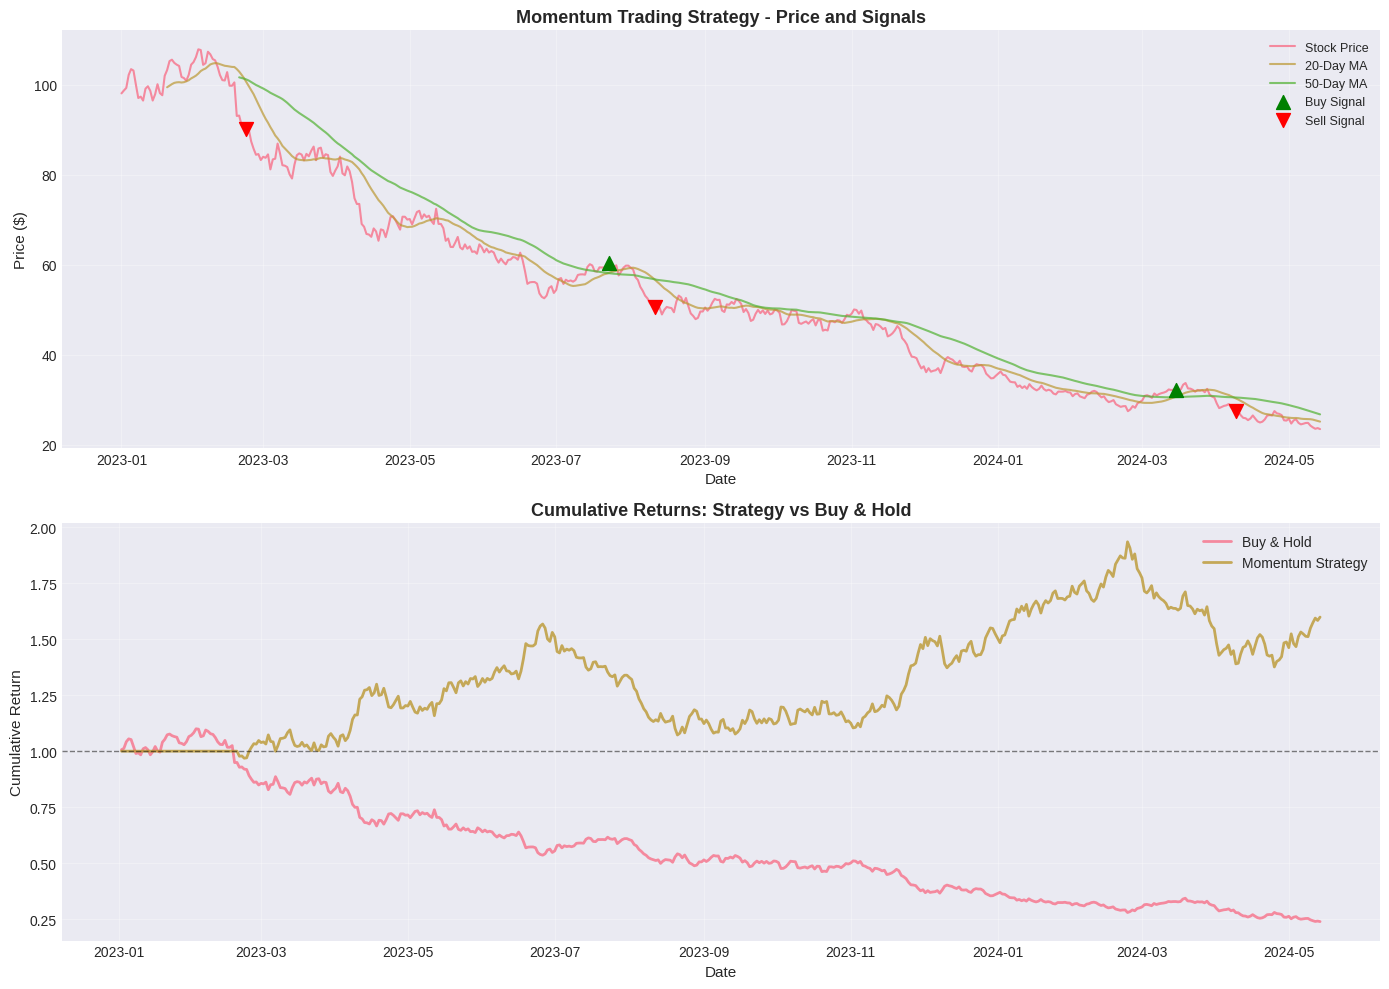


Visualization Insights:
- Green triangles (^) indicate buy signals when short MA crosses above long MA
- Red triangles (v) indicate sell signals when short MA crosses below long MA
- The bottom chart compares the cumulative performance of both strategies
- Moving average crossovers help identify trend changes in the market


In [15]:
# Visualize the trading strategy
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Price and Moving Averages with Signals
axes[0].plot(price_df.index, price_df['Price'], label='Stock Price', linewidth=1.5, alpha=0.8)
axes[0].plot(price_df.index, price_df['MA_Short'], label='20-Day MA', linewidth=1.5, alpha=0.7)
axes[0].plot(price_df.index, price_df['MA_Long'], label='50-Day MA', linewidth=1.5, alpha=0.7)

# Mark buy signals (golden crosses)
buy_signals = price_df[price_df['Position'] == 2]
axes[0].scatter(buy_signals.index, buy_signals['Price'], 
               marker='^', color='green', s=100, label='Buy Signal', zorder=5)

# Mark sell signals (death crosses)
sell_signals = price_df[price_df['Position'] == -2]
axes[0].scatter(sell_signals.index, sell_signals['Price'], 
               marker='v', color='red', s=100, label='Sell Signal', zorder=5)

axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Price ($)', fontsize=11)
axes[0].set_title('Momentum Trading Strategy - Price and Signals', fontsize=13, fontweight='bold')
axes[0].legend(loc='best', fontsize=9)
axes[0].grid(alpha=0.3)

# Plot 2: Cumulative Returns Comparison
axes[1].plot(price_df.index, price_df['Cumulative_Market_Return'], 
            label='Buy & Hold', linewidth=2, alpha=0.8)
axes[1].plot(price_df.index, price_df['Cumulative_Strategy_Return'], 
            label='Momentum Strategy', linewidth=2, alpha=0.8)
axes[1].axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Cumulative Return', fontsize=11)
axes[1].set_title('Cumulative Returns: Strategy vs Buy & Hold', fontsize=13, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisualization Insights:")
print("- Green triangles (^) indicate buy signals when short MA crosses above long MA")
print("- Red triangles (v) indicate sell signals when short MA crosses below long MA")
print("- The bottom chart compares the cumulative performance of both strategies")
print("- Moving average crossovers help identify trend changes in the market")

## Key Takeaways

### Important Concepts Learned

1. **Fraud Detection**: Machine learning models can identify fraudulent transactions by learning patterns from historical data. Key features include transaction amount, timing, location, and user behavior patterns.

2. **Credit Scoring**: AI-powered credit scoring models can assess borrower risk more accurately than traditional rule-based systems by considering complex interactions between multiple financial factors.

3. **Portfolio Optimization**: Modern portfolio theory combined with computational methods allows investors to find optimal asset allocations that maximize returns for a given level of risk, or minimize risk for a target return.

4. **Algorithmic Trading**: Automated trading strategies can identify and exploit market patterns, though real-world trading requires careful consideration of transaction costs, slippage, and market impact.

5. **Risk Management**: Statistical measures like VaR and CVaR help quantify and manage financial risk, enabling better decision-making under uncertainty.

### Practical Applications

- **Banking**: Real-time fraud detection, credit risk assessment, customer service chatbots
- **Investment Management**: Portfolio optimization, algorithmic trading, risk management
- **Insurance**: Claims fraud detection, risk pricing, underwriting automation
- **Fintech**: Robo-advisors, peer-to-peer lending platforms, payment processing

### Important Considerations

- **Data Quality**: Financial models are only as good as the data they're trained on
- **Regulatory Compliance**: Financial AI must comply with regulations like GDPR, fair lending laws
- **Model Interpretability**: Regulators often require explainable AI for financial decisions
- **Risk Management**: Models must be stress-tested and monitored continuously
- **Ethical Concerns**: Avoiding bias in credit scoring and ensuring fair treatment of all customers

## Further Resources

### Books
1. **"Advances in Financial Machine Learning"** by Marcos López de Prado - Comprehensive guide to machine learning in finance
2. **"Machine Learning for Asset Managers"** by Marcos López de Prado - Practical ML techniques for portfolio management
3. **"Python for Finance"** by Yves Hilpisch - Python programming for financial applications

### Online Resources
1. **Quantopian/QuantConnect**: Algorithmic trading platforms with educational resources and community forums
   - [https://www.quantconnect.com/](https://www.quantconnect.com/)

2. **Kaggle Credit Card Fraud Detection Dataset**: Practice fraud detection with real-world data
   - [https://www.kaggle.com/mlg-ulb/creditcardfraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

3. **Federal Reserve Economic Data (FRED)**: Free economic and financial data
   - [https://fred.stlouisfed.org/](https://fred.stlouisfed.org/)

4. **Alpha Vantage API**: Free stock market data API for algorithmic trading
   - [https://www.alphavantage.co/](https://www.alphavantage.co/)

5. **Journal of Financial Data Science**: Academic research on ML in finance
   - [https://jfds.pm-research.com/](https://jfds.pm-research.com/)

### Python Libraries
1. **QuantLib**: Quantitative finance library for pricing and risk management
2. **PyPortfolioOpt**: Portfolio optimization library
3. **yfinance**: Download market data from Yahoo Finance
4. **backtrader**: Backtesting framework for trading strategies
5. **ta-lib**: Technical analysis library

### Courses and Tutorials
1. **Coursera - Machine Learning for Trading**: Specialization by Google Cloud and New York Institute of Finance
2. **edX - Principles of Machine Learning: Python Edition**: Microsoft course with financial applications
3. **DataCamp - Machine Learning for Finance in Python**: Hands-on track for financial ML

### Research Papers
1. **"Deep Learning for Limit Order Books"** - Using neural networks for financial prediction
2. **"Financial Sentiment Analysis for Risk Management"** - NLP applications in finance
3. **"Explainable AI for Credit Scoring"** - Ensuring fairness and transparency in lending

### Important Note
Always remember that past performance does not guarantee future results. Any trading strategy should be thoroughly backtested, and real money should only be risked after proper validation and risk management procedures are in place.